In [5]:
import pandas as pd
file_path = '/Users/zoezhuang/Desktop/recent_10_years_data.csv'
df = pd.read_csv(file_path)
df.head()

,title,president,publication_date,signing_date,citation,document_number,executive_order_number,pdf_url,toc_subject,disposition_notes,cleaned_text
0,Combating Emerging Firearms Threats and Improv...,Joseph R. Biden Jr.,2024-10-02,2024-09-26,89 FR 80345,2024-22938,14127,https://www.govinfo.gov/content/pkg/FR-2024-10...,Unspecified,NaN,Executive Order 14127--Combating Emerging Fire...
1,Investing in America and Investing in American...,Joseph R. Biden Jr.,2024-09-11,2024-09-06,89 FR 73559,2024-20712,14126,https://www.govinfo.gov/content/pkg/FR-2024-09...,Federal Government,"See: EO 11246, September 24, 1965; EO 13985, J...","Executive Order 14126 of September 6, 2024 ..."
2,Establishing an Emergency Board To Investigate...,Joseph R. Biden Jr.,2024-07-29,2024-07-24,89 FR 60791,2024-16740,14125,https://www.govinfo.gov/content/pkg/FR-2024-07...,Committees; Establishment,NaN,"Executive Order 14125 of July 24, 2024 ..."
3,White House Initiative on Advancing Educationa...,Joseph R. Biden Jr.,2024-07-22,2024-07-17,89 FR 59585,2024-16225,14124,https://www.govinfo.gov/content/pkg/FR-2024-07...,Education,"See: EO 14045, September 13, 2021",Executive Order 14124--White House Initiative ...
4,White House Council on Supply Chain Resilience,Joseph R. Biden Jr.,2024-06-21,2024-06-14,89 FR 51949,2024-13810,14123,https://www.govinfo.gov/content/pkg/FR-2024-06...,Committees; Establishment,"See: EO 14017, February 24, 2021\r\nSupersedes...","Executive Order 14123 of June 14, 2024 ..."


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import string
import numpy as np

#Text Preprocessing
def preprocess(text):
    # Convert text to lowercase and remove punctuation
    return text.lower().translate(str.maketrans('', '', string.punctuation))

# Apply
df['cleaned_text'] = df['cleaned_text'].apply(preprocess)

# Count Vectorization
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])

# LDA Topic Modeling
n_topics = 6  # Increase the number of topics to discover
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20, learning_decay=0.7, random_state=42)
lda.fit(X)

# Assign Topics to Each Document
topic_labels = lda.transform(X).argmax(axis=1)

topic_names = {
    0: 'cybersecurity',
    1: 'artificial intelligence',
    2: 'technology',
    3: 'software',
    4: 'public health',
    5: 'economic policy'
}

df['category'] = [topic_names[label] for label in topic_labels]

# Display Texts in Each Topic
for topic_id, topic_name in topic_names.items():
    print(f"\n--- Texts in Topic ({topic_name}) ---")
    topic_texts = df[df['category'] == topic_name]['cleaned_text'].head(5)  # Display first 5 texts
    for idx, text in enumerate(topic_texts, 1):
        print(f"\nText {idx}:\n{text[:500]}...")  # Print first 500 characters for brevity

# Grouping by Year and Topic
df['year'] = pd.to_datetime(df['signing_date']).dt.year
topic_by_year = df.groupby(['year', 'category']).size().unstack(fill_value=0)


--- Texts in Topic (cybersecurity) ---

Text 1:
executive order 14124white house initiative on advancing educational  equity excellence and economic opportunity through hispanicserving  institutions ...

Text 2:
executive order 14121 of march 27 2024                   recognizing and honoring womens history                  by the authority vested in me as president by the                  constitution and the laws of the united states of                  america it is hereby ordered as follows                  section 1 policy women and girls of all backgrounds                  have shaped our countrys history from the ongoing                  fight for justice and equality to cuttingedge              ...

Text 3:
executive order 14120 of march 18 2024                   advancing womens health research and innovation                  by the authority vested in me as president by the                  constitution and the laws of the united states of                  america it is here

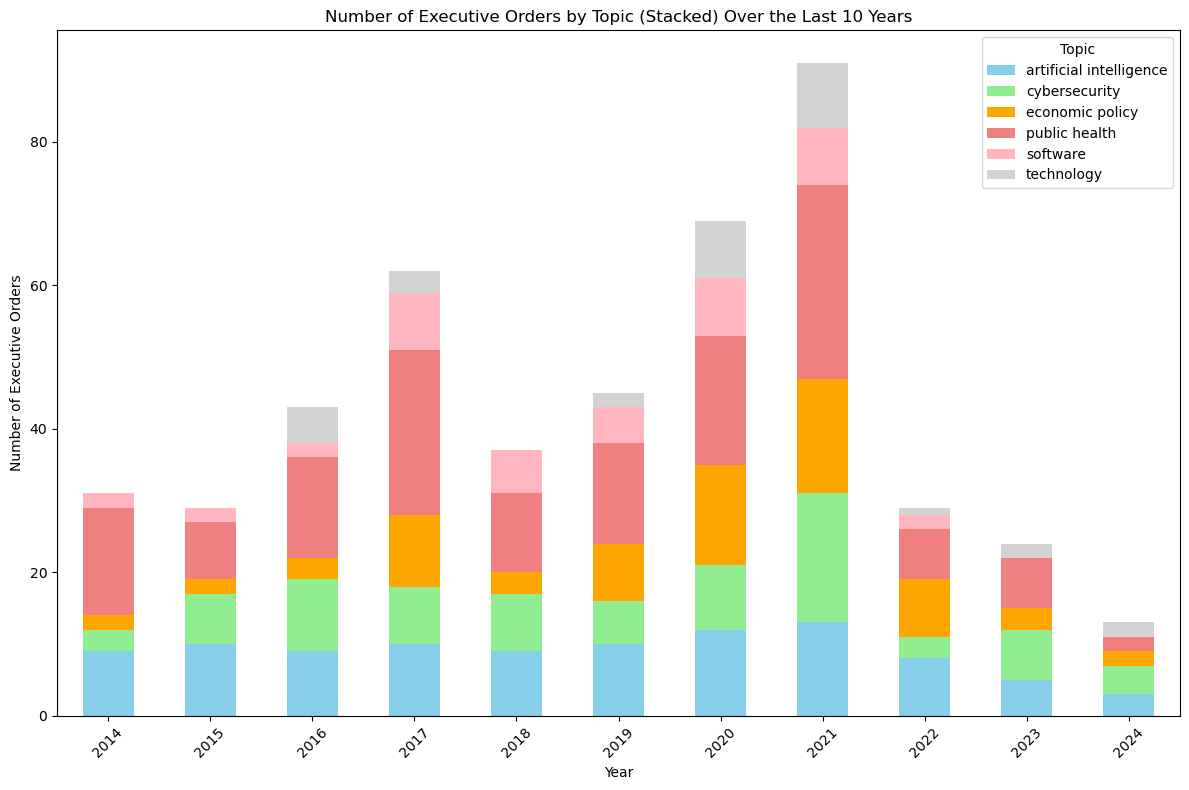

In [58]:
# Generate the Stacked Bar Plot
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral', 'lightpink', 'lightgrey']  # Ensure colors match topics
topic_by_year.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Number of Executive Orders by Topic (Stacked) Over the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('Number of Executive Orders')
plt.xticks(rotation=45)
plt.legend(title='Topic')
plt.tight_layout()
plt.show()